In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
class Ajuste:
    direccion = ""

    def __init__(self, direccion):
        self.direccion = direccion
        datos = pd.read_csv (direccion, sep=',')
        self.x = np.array(datos)[:, 3]
        self.y = np.array(datos)[:, 1]
        self.rango = np.array([0, len(self.x)])

    def setRango(self, datoInicial, datoFinal):
        self.rango = np.array([datoInicial, datoFinal])

    def graficarDatos(self, ejex, ejey, tit):
        plt.plot(self.x[self.rango[0]:self.rango[1]], self.y[self.rango[0]:self.rango[1]],'.')
        plt.xlabel(ejex)
        plt.ylabel(ejey)
        plt.title(tit)
        plt.grid()
        plt.show()

    def valoresAjuste(self, function, val_ini):
        self.mej_val, self.cov = curve_fit(function, xdata = self.x[self.rango[0]:self.rango[1]], ydata = self.y[self.rango[0]:self.rango[1]], p0 = val_ini)
        print('mej_val: {}'.format(self.mej_val))
        self.errores = np.sqrt(np.diagonal(self.cov))
        print('Errores: {}'.format(self.errores))
        #print(self.cov)

    def graficaAjuste(self, function,cantidadArgumentos, ejex, ejey, tit):
        if cantidadArgumentos == 1:
            self.yaj = function(self.x[self.rango[0]:self.rango[1]], self.mej_val[0])
        if cantidadArgumentos == 2:
            self.yaj = function(self.x[self.rango[0]:self.rango[1]], self.mej_val[0],self.mej_val[1])
        if cantidadArgumentos == 3:
            self.yaj = function(self.x[self.rango[0]:self.rango[1]], self.mej_val[0],self.mej_val[1],self.mej_val[2])
        if cantidadArgumentos == 4:
            self.yaj = function(self.x[self.rango[0]:self.rango[1]], self.mej_val[0],self.mej_val[1],self.mej_val[2], self.mej_val[4])
        plt.plot(self.x[self.rango[0]:self.rango[1]], self.yaj, 'red')
        plt.plot(self.x[self.rango[0]:self.rango[1]], self.y[self.rango[0]:self.rango[1]], '.')
        plt.xlabel(ejex)
        plt.ylabel(ejey)
        plt.title(tit)
        plt.grid()
        plt.show()

    def graficaResiduos(self):
        yres = self.yaj - self.y[self.rango[0]:self.rango[1]]
        yz = np.zeros(self.x[self.rango[0]:self.rango[1]].shape)
        plt.plot(self.x[self.rango[0]:self.rango[1]], yres, 'o')
        plt.plot(self.x[self.rango[0]:self.rango[1]], yz, '--')
        plt.title("Grafica Residuos")
        plt.grid()
        plt.show()

    def chiCuadrado(self, reducirBins, esExp):
        #Definimos el numero de intervalos para el test de chi cuadrado usando el criterio de Sturges
        self.nbin=int(1+3.322*np.log10(101)) - reducirBins
        print("Numero de bines que tendra histograma: ", self.nbin)

        #Definimos un rango minimo y maximo comun para los datos obtenidos experimentamente y por medio del ajuste
        ymin1=min(self.y[self.rango[0]:self.rango[1]])
        ymin2=min(self.yaj)
        if ymin1>ymin2:
            ymin=ymin2
        else:
            ymin=ymin1

        ymax1=max(self.y[self.rango[0]:self.rango[1]])
        ymax2=max(self.yaj)
        if ymax1>ymax2:
            ymax=ymax1
        else:
            ymax=ymax2

        print("Valor minimo histograma:", ymin)
        print("Valor maximo histograma:", ymax)

        #Se hace el histograma dividiendo el rango definido arriba entre el numero de intervalos calculado previamente. Esto lo hace la funcion plt.hist automaticamente.

        fig, ax = plt.subplots()
        if (esExp):
            bins = np.array([0,0.015,0.024,0.03])
            [self.naj,self.baj,self.paj]= ax.hist(self.yaj,bins)
            [self.n,self.b,self.p]= ax.hist(self.y[self.rango[0]:self.rango[1]], bins)
            plt.show()
        else:
            [self.naj,self.baj,self.paj]=ax.hist(self.yaj,self.nbin,range=(ymin,ymax))
            [self.n,self.b,self.p]=ax.hist(self.y[self.rango[0]:self.rango[1]],self.nbin,range=(ymin,ymax))
            plt.show()

        print("Cantidad datos de los bines: ", self.n)

        def chi_sqr(dathistexp, dathistaj):
            return sum(( (dathistexp-dathistaj)**2 ) / (dathistaj))

        print("Cantidad datos bines ajuste: ", self.naj)
        print('Chi cuadrado =', chi_sqr(self.n, self.naj))

    def linealizacion(self, ejex, ejey, tit):
        self.logY = self.y[self.rango[0]:self.rango[1]]**2
        self.logYaj = self.yaj**2

        plt.plot(self.x[self.rango[0]:self.rango[1]], self.logYaj, 'red')
        plt.plot(self.x[self.rango[0]:self.rango[1]], self.logY, '.')
        plt.xlabel(ejex)
        plt.ylabel(ejey)
        plt.title(tit)
        plt.grid()
        plt.show()

        def r_sqr(datexp,dataj):
            return 1-sum((datexp-dataj)**2)/sum((datexp-np.mean(datexp))**2)

        print('r^2 = ', r_sqr(self.logY,self.logYaj))

In [3]:
def r(t, C):
    return C*np.sqrt(t)

mej_val: [0.04121193]
Errores: [0.00043637]


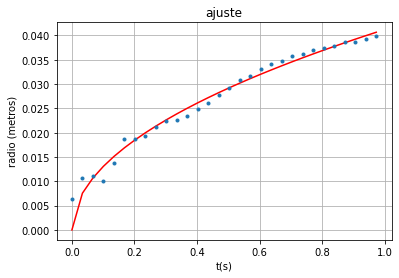

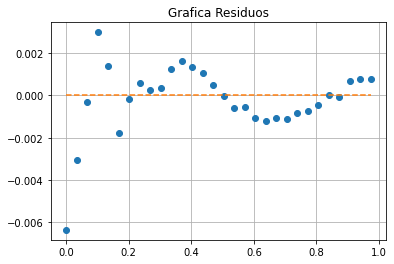

Numero de bines que tendra histograma:  2
Valor minimo histograma: 0.0
Valor maximo histograma: 0.04065498839145361


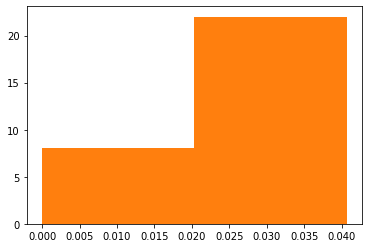

Cantidad datos de los bines:  [ 8. 22.]
Cantidad datos bines ajuste:  [ 8. 22.]
Chi cuadrado = 0.0


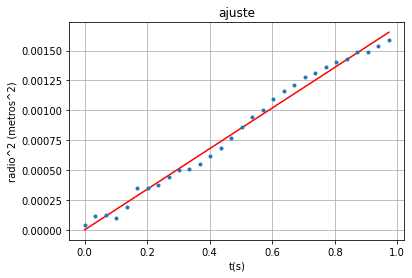

r^2 =  0.9895273725212848


In [4]:
ej2a = Ajuste(r"video1.csv")
ej2a.setRango(0, 30)
ej2a.valoresAjuste(r, 1)
ej2a.graficaAjuste(r, 1, 't(s)', 'radio (metros)', 'ajuste')
ej2a.graficaResiduos()
ej2a.chiCuadrado(5, False)
ej2a.linealizacion('t(s)', 'radio^2 (metros^2)', 'ajuste')

In [13]:
D = (ej2a.mej_val[0]**2)/(4*np.log(1/0.5))
# D = D*1/(100**2)

In [12]:
errD = D * ej2a.errores[0]/ej2a.mej_val[0]

In [14]:
print("El coeficiente de difusion es %f+-%f m^2/s" %(D,errD))

El coeficiente de difusion es 0.000613+-0.000006 m^2/s


In [6]:
datos = pd.read_csv (r"video1.csv", sep=',')
datos

,Unnamed: 0,radios(centimetros),radios(pixeles),tiempo
0,0,0.006359,31.5,0.000000
1,1,0.010599,52.5,0.033557
2,2,0.011003,54.5,0.067114
3,3,0.010094,50.0,0.100671
4,4,0.013728,68.0,0.134228
...,...,...,...,...
145,145,0.046131,228.5,4.865772
146,146,0.046231,229.0,4.899329
147,147,0.046534,230.5,4.932886
148,148,0.046534,230.5,4.966443


In [111]:
radios = np.array(datos)[:,1]
radios = radios[0:35]
t = np.array(datos)[:,2]
t = t[1:36]
radios

array([ 31.5,  52.5,  54.5,  50. ,  68. ,  92.5,  92.5,  96. , 104.5,
       110.5, 112. , 116. , 123. , 129.5, 137.5, 145. , 152.5, 157. ,
       164. , 169. , 172.5, 177. , 179.5, 183. , 185.5, 187. , 191. ,
       191. , 194. , 197.5, 198. , 199.5, 200.5, 197. , 201. ])

In [112]:
radios1 = r(t, ej2a.mej_val[0])
radios1

array([ 36.80662415,  52.05242706,  63.75094309,  73.61324831,
        82.30211363,  90.15744833,  97.38117411, 104.10485413,
       110.41987246, 116.39276531, 122.07376212, 127.50188618,
       132.70817066, 137.71777715, 142.55144238, 147.22649662,
       151.75759911, 156.15728119, 160.43635514, 164.60422726,
       168.66914126, 172.63837   , 176.51836838, 180.31489666,
       184.03312077, 187.67769479, 191.25282927, 194.76234822,
       198.20973706, 201.59818315, 204.93061028, 208.20970826,
       211.43795826, 214.61765485, 217.75092504])

In [64]:
import os
os.mkdir("graficasVideo1")

<ipython-input-113-69830295796b>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,8))


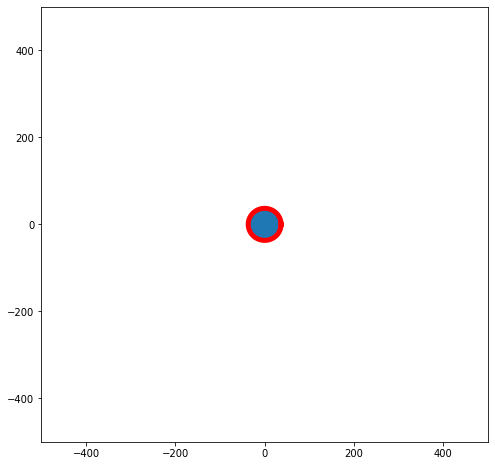

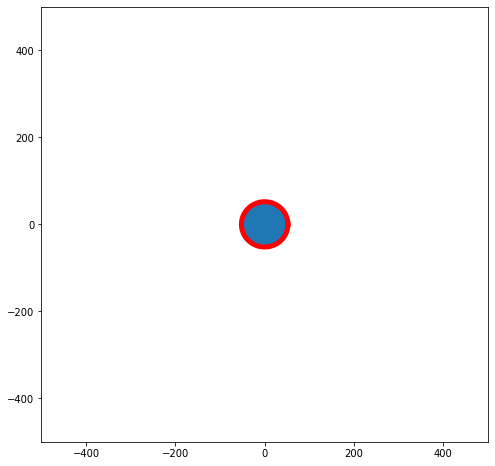

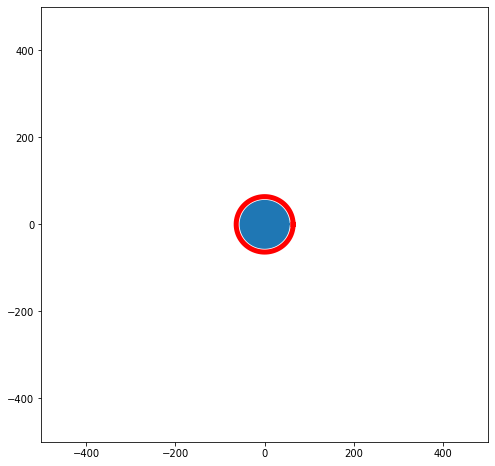

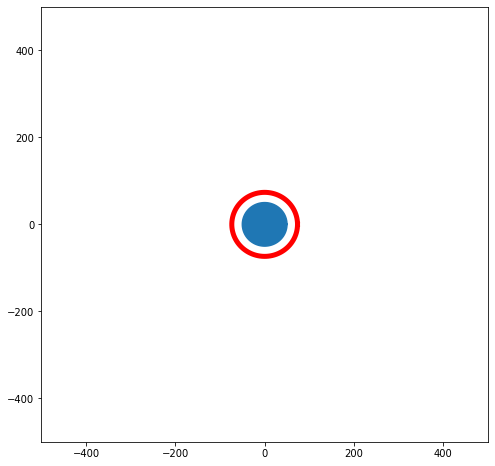

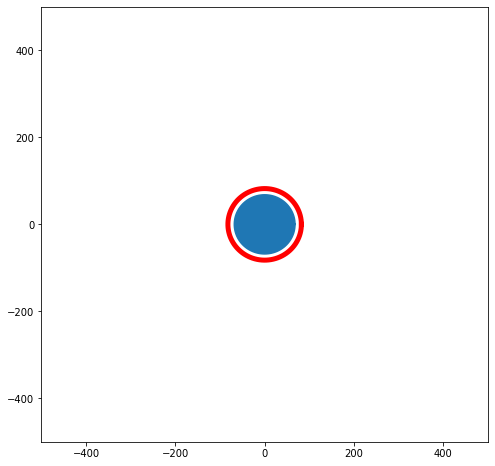

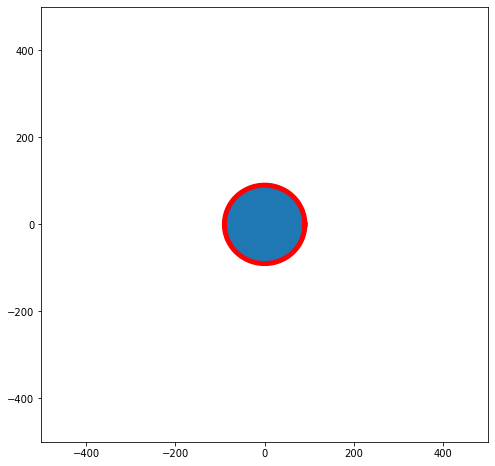

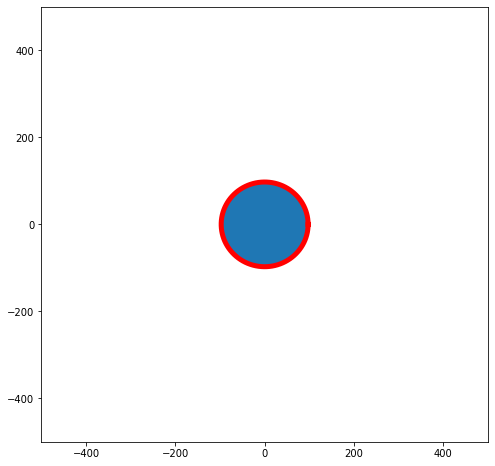

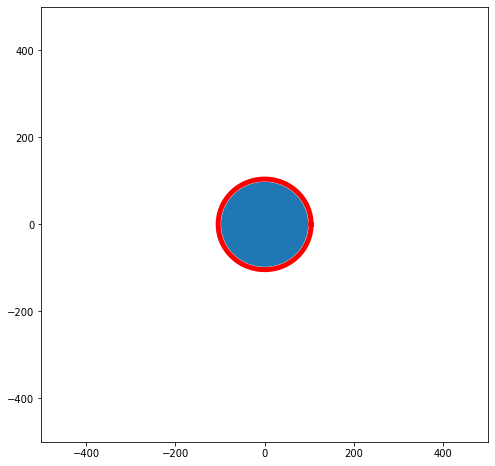

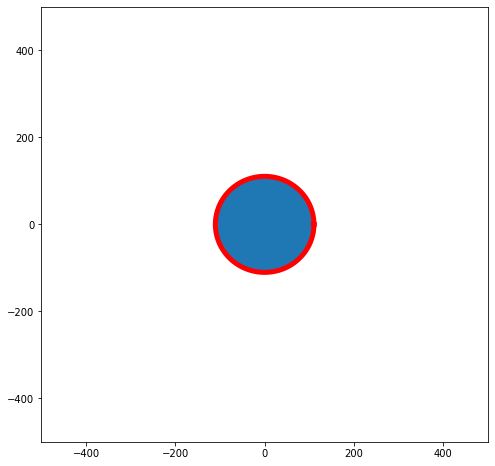

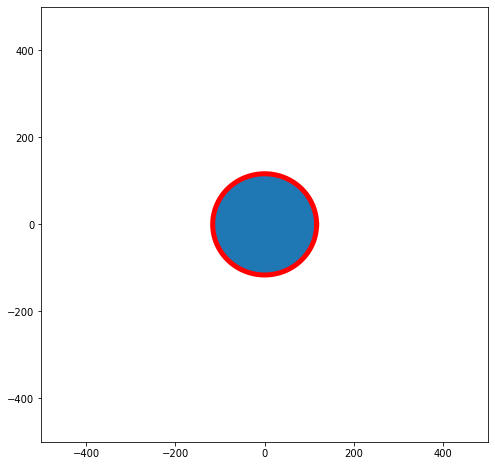

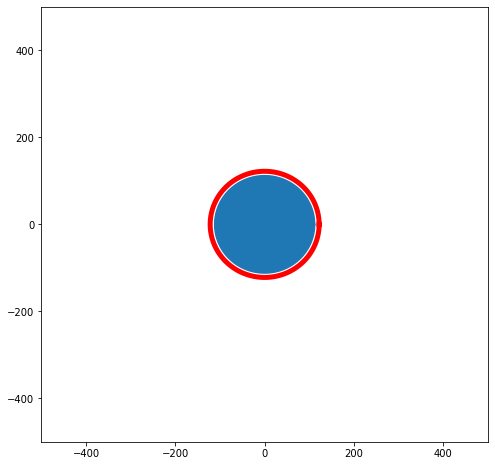

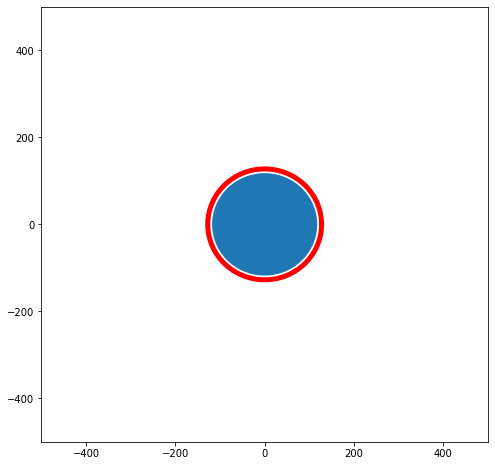

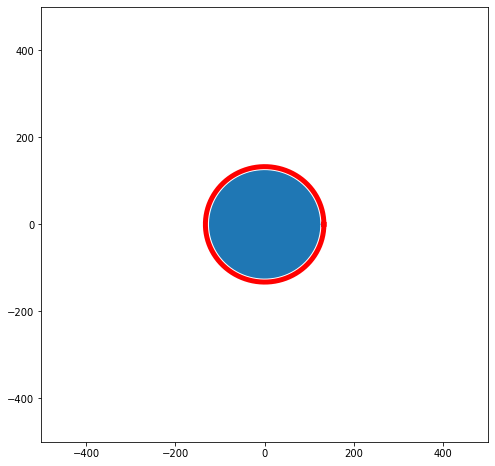

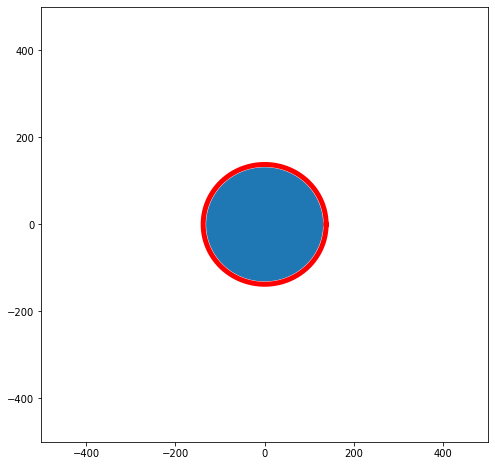

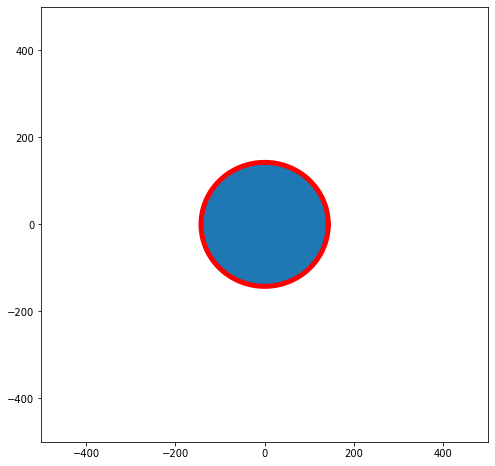

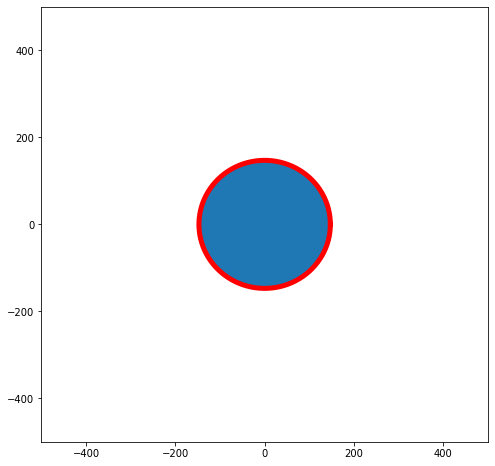

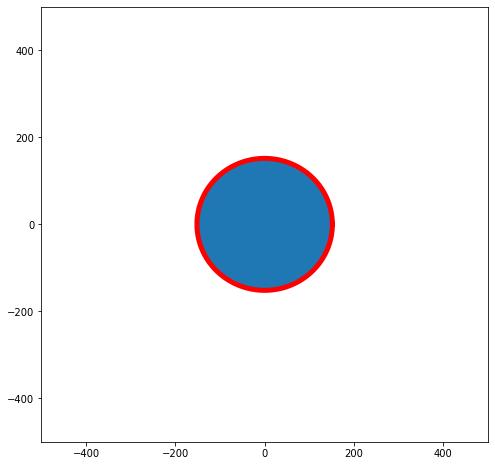

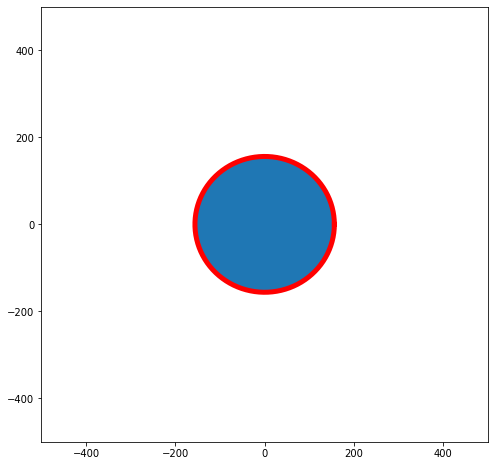

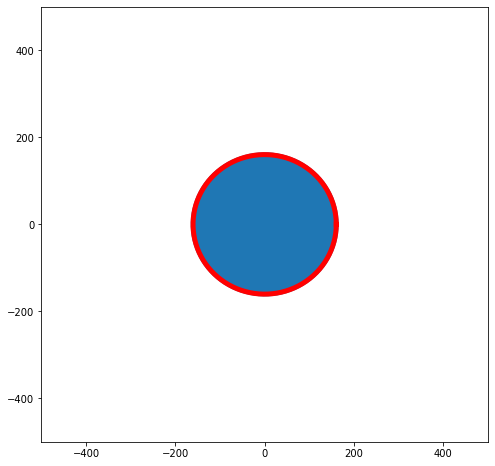

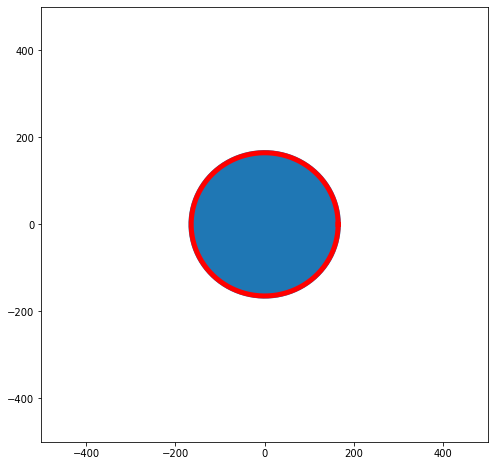

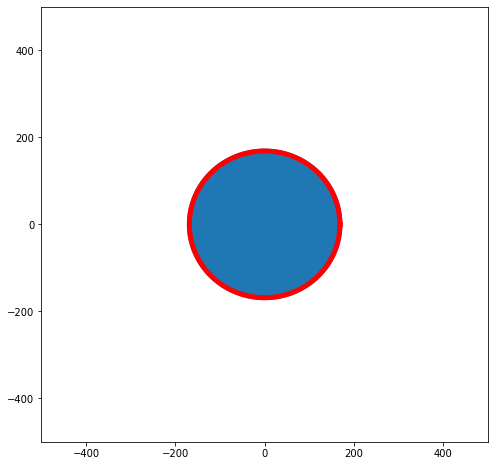

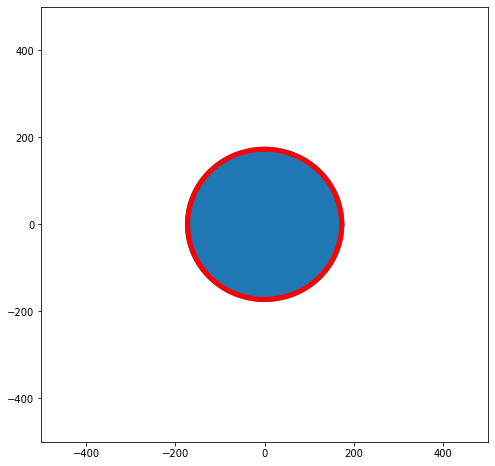

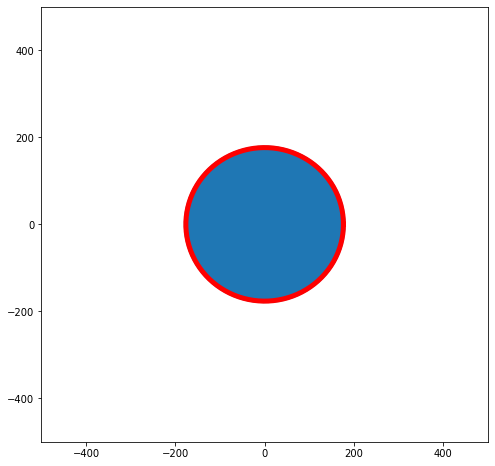

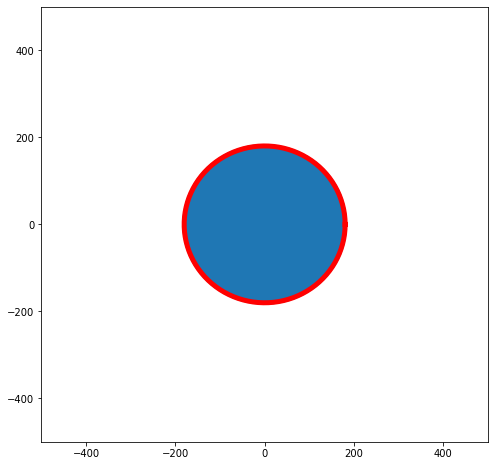

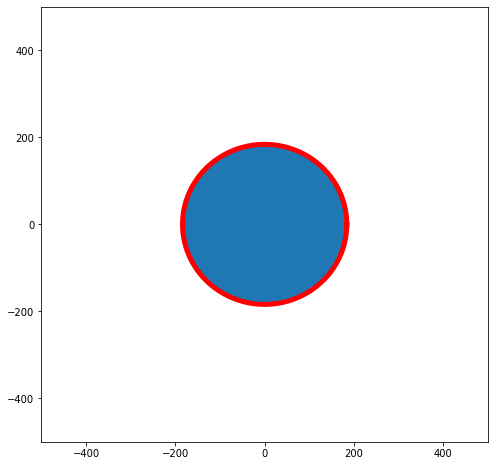

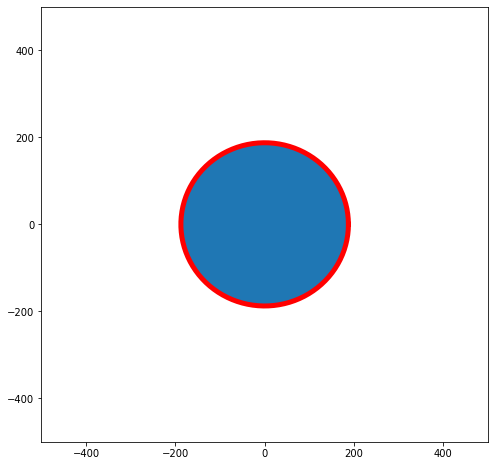

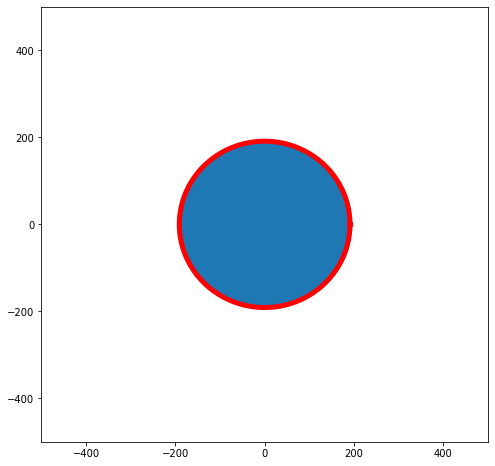

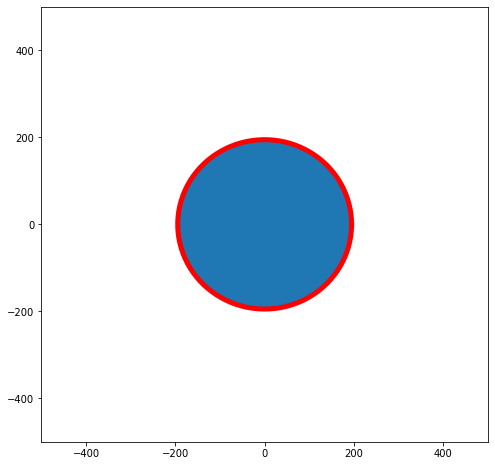

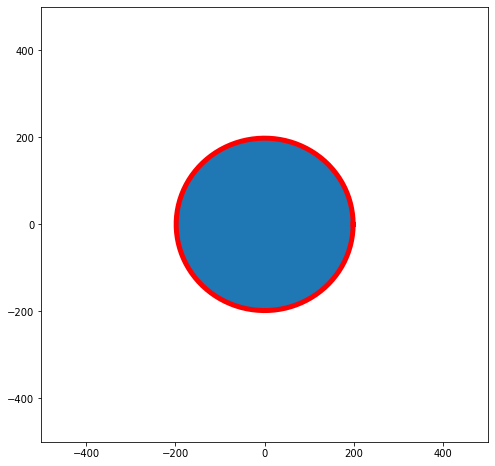

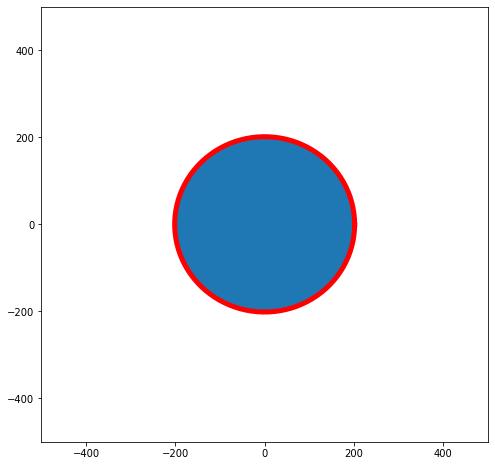

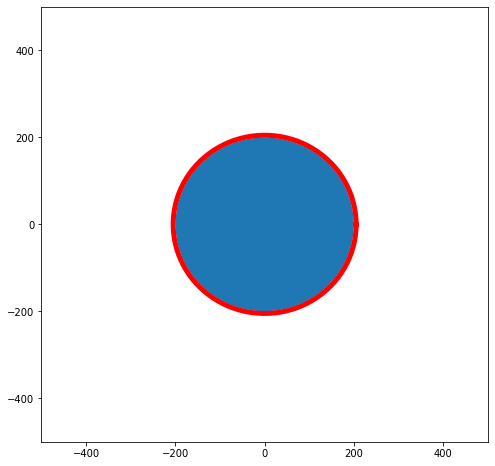

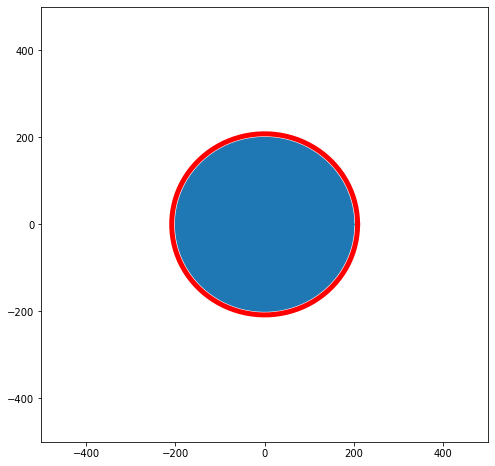

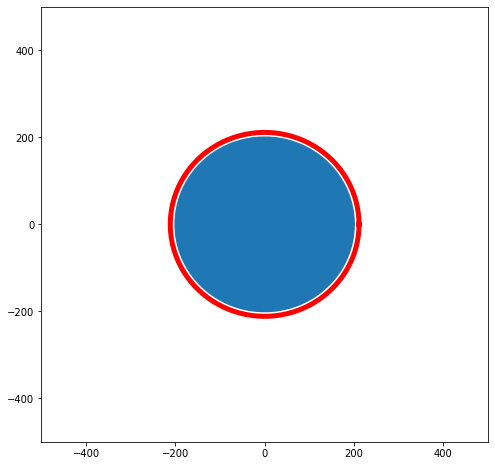

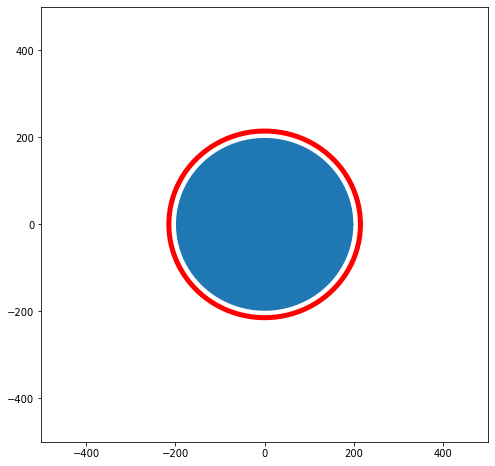

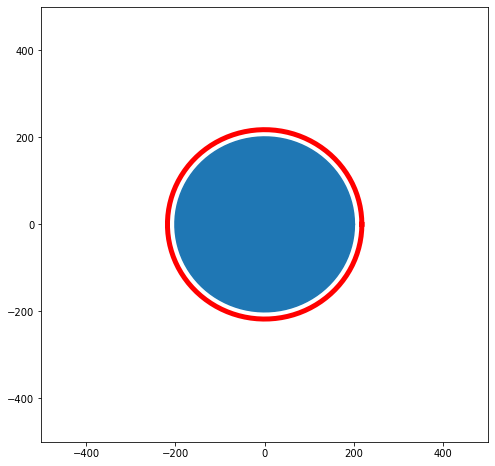

In [113]:
theta = np.linspace(0, 2*np.pi, 100)

for i in range(0, len(radios)):
    a = radios[i]*np.cos(theta)
    b = radios[i]*np.sin(theta)
    a1 = radios1[i]*np.cos(theta)
    b1 = radios1[i]*np.sin(theta)
    i = i+1

    plt.figure(figsize=(8,8))
    plt.plot(a, b)
    plt.fill(a,b)
    plt.plot(a1, b1, 'red', linewidth=5)
    plt.xlim(-500,500)
    plt.ylim(-500,500)

    plt.savefig("./graficasVideo1/circulo%d.png" %i,dpi=300)

In [114]:
import cv2

#Arreglo vacío
img_array = []

#For para leer imagenes desde un directorio
for i in range (0,36):
    path = "./graficasVideo1/circulo%d.png" %i
    img = cv2.imread(path)
    img_array.append(img)

#Tamaño de la última imagen alto y ancho
height, width  = img_array[35].shape[:2]

video = cv2.VideoWriter('videoDatos1.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 5, (width,height))

#For para guardar frames en un video
for i in range(len(img_array)):
    video.write(img_array[i])

video.release()

In [104]:
imagen = cv2.imread("./%s/frame%d.jpg" % ("video1", 375), 0)
# Se recorta el frame
imagen = np.array(imagen[330:850, 630:1200])
#Dibujando lineas
#cv2.circle(imagen,(300,200),100,(255,255,0),-1)
cv2.circle(imagen,(270,240),240,(255,0,255),1)
cv2.imshow('imagen',imagen)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [122]:
radios = np.array(datos)[:,1]
t = np.array(datos)[:,2]
radios1 = r(t, ej2a.mej_val[0])

#Arreglo vacío
img_array = []

#For para leer imagenes desde un directorio
for i in range (300,450):
    path = "./video1/frame%d.jpg" %i
    img = cv2.imread(path)
    img = np.array(img[330:850, 630:1200])
    cv2.line(img,(285,0),(285,570), (0, 0,0), 1)
    cv2.circle(img,(285,240), int(radios[i-300]),(0,0,255),1)
    cv2.circle(img,(285,240), int(radios1[i-300]),(255,0,0),1)
    img_array.append(img)

#Tamaño de la última imagen alto y ancho
height, width  = img_array[34].shape[:2]

video = cv2.VideoWriter('videoR.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 5, (width,height))

#For para guardar frames en un video
for i in range(len(img_array)):
    video.write(img_array[i])

video.release()